### ***Task:  How do annual members and casual riders use Cyclistic bikes differently?***

#### Initial data preparation and clean up has been done in SQL - please see [My Github](https://github.com/FsdWl/Portfolio/blob/bac208b3795951b575b8a88e560637971cb30a15/Chicago%20Bike%20Sharing/SQL%20data%20preparation)

In [1]:
library(tidyverse)
library(janitor)
library(lubridate)
library(ggplot2)

# Reading data set
tripdata_2020_11_2021_10_clean <- read_csv("../input/case-study-cyclistic-bikeshare/tripdata2020_11_2021_10_clean.csv")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Rows: 4989486 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): ride_id, rideable_type, member_casual, day_of_week, started_at, en...
dbl  (5): ride_length, start_lat, start_lng, end_lat, end_lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

#### Adding day, month, year, and time into separate columns

In [2]:
tripdata_2020_11_2021_10_clean $ day <- format(as.Date(tripdata_2020_11_2021_10_clean $ started_at),"%d")
tripdata_2020_11_2021_10_clean $ month <- format(as.Date(tripdata_2020_11_2021_10_clean $ started_at),"%b")
tripdata_2020_11_2021_10_clean $ year <- format(as.Date(tripdata_2020_11_2021_10_clean $ started_at),"%Y")
tripdata_2020_11_2021_10_clean $ hour <- substr(tripdata_2020_11_2021_10_clean $ started_at, 12,13)


#### Data preview

In [3]:
head(tripdata_2020_11_2021_10_clean)
nrow(tripdata_2020_11_2021_10_clean)

ride_id,rideable_type,member_casual,day_of_week,started_at,ended_at,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,day,month,year,hour
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0C07A9CB76052959,docked_bike,casual,Saturday,2020-11-14 11:31:42 UTC,2020-11-14 11:47:42 UTC,16,Halsted St & Clybourn Ave,331,Halsted St & Clybourn Ave,331,41.90967,-87.64813,41.90967,-87.64813,14,Nov,2020,11
E0651AC2E45767C7,docked_bike,casual,Friday,2020-11-06 20:13:44 UTC,2020-11-06 20:32:14 UTC,19,Halsted St & Clybourn Ave,331,Halsted St & Clybourn Ave,331,41.90967,-87.64813,41.90967,-87.64813,06,Nov,2020,20
DE433CF581568F79,docked_bike,member,Friday,2020-11-06 12:49:33 UTC,2020-11-06 12:56:32 UTC,7,Halsted St & Clybourn Ave,331,Halsted St & Clybourn Ave,331,41.90967,-87.64813,41.90967,-87.64813,06,Nov,2020,12
7F9FD92D71F3D5A9,docked_bike,casual,Monday,2020-11-09 15:00:00 UTC,2020-11-09 16:26:48 UTC,86,Halsted St & Clybourn Ave,331,Halsted St & Clybourn Ave,331,41.90967,-87.64813,41.90967,-87.64813,09,Nov,2020,15
D6C2A24D7C9BF84C,electric_bike,member,Wednesday,2020-11-04 16:23:43 UTC,2020-11-04 16:25:46 UTC,2,Halsted St & Clybourn Ave,331,Halsted St & Clybourn Ave,331,41.90962,-87.64810,41.90962,-87.64810,04,Nov,2020,16
25F266C9A4C081A1,electric_bike,member,Friday,2020-11-06 21:35:14 UTC,2020-11-06 21:41:32 UTC,6,Halsted St & Clybourn Ave,331,Halsted St & Clybourn Ave,331,41.90966,-87.64810,41.90962,-87.64812,06,Nov,2020,21


[1] 4989486

#### Analysis on ride_length (all figures in minutes)

##### Data summary 
Since we have cleaned the data in SQL before hand - removing 0 and negative ride length, as well as ride length > 1 day (1440 minutes) - min and max ride length are within out parameters. While average ride length is just over 20 minutes.


In [4]:
summary(tripdata_2020_11_2021_10_clean $ ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    7.00   13.00   20.45   23.00 1439.00 

##### Comparing mean ride_length between member and ride type

Casual users actually ride longer than members. 

In [5]:
tripdata_2020_11_2021_10_clean %>% 
  group_by(member_casual) %>% 
  summarize(mean(ride_length)) %>% 
  arrange(member_casual)

member_casual,mean(ride_length)
<chr>,<dbl>
casual,28.50883
member,13.58174


Docked bikes seem to be the most popular type in general. 

In [6]:
tripdata_2020_11_2021_10_clean %>% 
  group_by(rideable_type) %>% 
  summarize(mean(ride_length)) %>% 
  arrange(rideable_type)

rideable_type,mean(ride_length)
<chr>,<dbl>
classic_bike,18.80412
docked_bike,40.60152
electric_bike,16.43211


However, docked bikes are only popular among casual riders, while members seem to have no preferences. 

In [7]:
tripdata_2020_11_2021_10_clean %>% 
  group_by(rideable_type, member_casual) %>% 
  summarize(mean(ride_length)) %>% 
  arrange(member_casual, rideable_type)

`summarise()` has grouped output by 'rideable_type'. You can override using the `.groups` argument.



rideable_type,member_casual,mean(ride_length)
<chr>,<chr>,<dbl>
classic_bike,casual,26.01195
docked_bike,casual,48.42535
electric_bike,casual,20.56288
classic_bike,member,13.83672
docked_bike,member,13.87479
electric_bike,member,12.58421


##### Usage behaviour breakdown per day

For casual riders, largest number of total usage during weekends, and longer ride time as well.

In contrast members usage actually higher during mid week, and lower during weekends, although average ride time is higher during the weekends. 



`summarise()` has grouped output by 'member_casual', 'day_of_week'. You can override using the `.groups` argument.



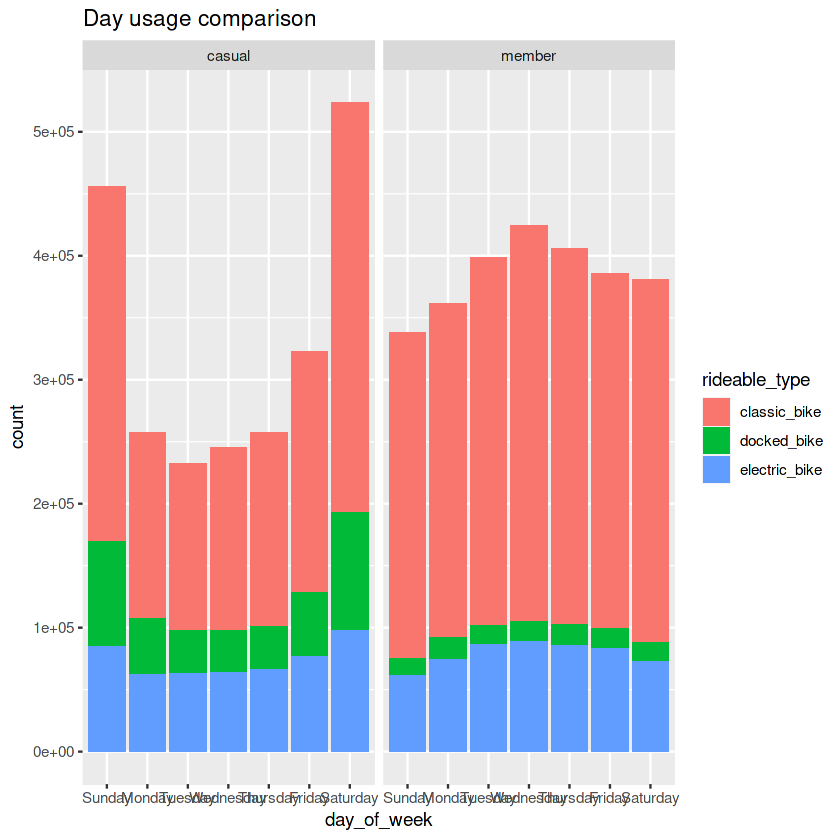

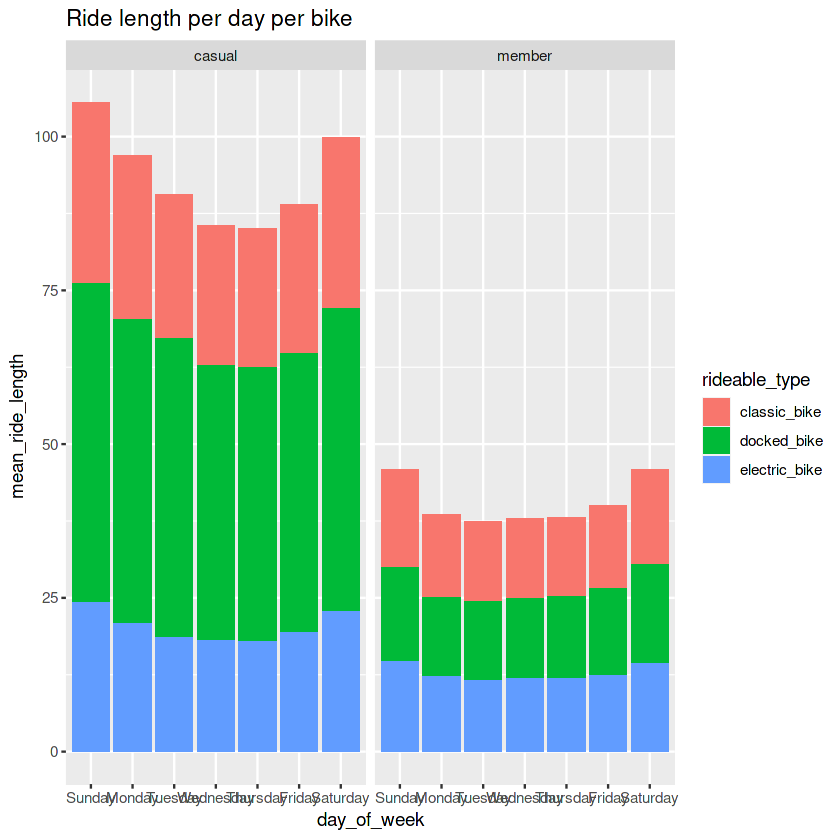

In [8]:
# giving orders/ levels to days of the week so that they shows in the correct order, i.e. Sunday to Saturday
tripdata_2020_11_2021_10_clean $ day_of_week <- ordered(tripdata_2020_11_2021_10_clean $ day_of_week, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# plotting the daily total usage difference of member vs. casual 
ggplot(data = tripdata_2020_11_2021_10_clean) + 
  geom_bar(mapping = aes(x = day_of_week, fill = rideable_type)) +
  facet_wrap(~member_casual) +
  labs(title = "Day usage comparison")

# See the average ride time by each weekday for members vs casual users
weekday_tripdata <- tripdata_2020_11_2021_10_clean %>% 
  group_by(member_casual, day_of_week, rideable_type) %>% 
  summarize(mean_ride_length = mean(ride_length), number_of_rides = n()) %>%  # also renaming column mean(ride_length) to mean_ride_length 
  arrange(day_of_week, member_casual, rideable_type)

# plotting the weekday average ride length between member vs. casual
ggplot(data = weekday_tripdata) + 
  geom_col(mapping = aes(x = day_of_week, y = mean_ride_length, fill = rideable_type)) +
  facet_grid(~member_casual) + 
  labs(title = "Ride length per day per bike ")

#### In summary: 
* Doked bike is more popular for casual users, while members do not have preference.
* Higher usage for casual users during weekkend, while members rides more during weekday. 
* Casual users generally use the bikes for >2x longer compared to member.
* Both casual users and members ride longer during weekends.


#### Further analysis to be done: 
* Identify the route pattern for casual and members, whether usage dependent on specific location/ area. 
* Understand why docked bikes are more popular among casual users compared to other types. 
* Investigate factors that contribute to longer ride time for casual users. 